## Module submission header
### Submission preparation instructions 
_Completion of this header is mandatory, subject to a 2-point deduction to the assignment._ Only add plain text in the designated areas, i.e., replacing the relevant 'NA's. You must fill out all group member Names and Drexel email addresses in the below markdown list, under header __Module submission group__. It is required to fill out descriptive notes pertaining to any tutoring support received in the completion of this submission under the __Additional submission comments__ section at the bottom of the header. If no tutoring support was received, leave NA in place. You may as well list other optional comments pertaining to the submission at bottom. _Any distruption of this header's formatting will make your group liable to the 2-point deduction._

### Module submission group
- Group member 1
    - Name: max bezahler
    - Email: meb25@drexel.edu
- Group member 2
    - Name: Yushan Cai
    - Email: yc844@drexel.edu
- Group member 3
    - Name: Yunxuan Hu
    - Email: yh575@drexel.edu 
- Group member 4
    - Name: NA
    - Email: NA

### Additional submission comments
- Tutoring support received: NA
- Other (other): Stack Overflow and help docs 

# Assignment group 3: Probabilistic modeling and prediction

## Module A _(55 pts)_ Optimizing for predicted separation
__Data.__ For this module we'll be working with the basic baseball player heights and weights from the lecture notes. These are packaged in the following location:

- `"./data/baseball_heightweight.csv"`

__Overview.__ The purpose of this module is to provide experience with optimization and to view/investigate a different optimizable functions (from error). In the __Chapter 5.__ lecture notes we investigated the sum of squared errors as a function of (linear) model parameters. This made the goal of optimization (executed through gradient descent) into a 'fitting' procedure, i.e., describing a pattern that data follow.

Another way we can use a line is as a 'separator': supposing some data $x_1, \cdots, x_n$ have labels $y_1, \cdots, y_n$ falling into two classes (coded as $\pm 1$), which set of line-defining $w$ and $b$ parameters separate the points the best. Check out the picture  below for an intution (note: their $b$ is our $-b$).

Note: even though we're talking about 'lines', and actually working with true, 2-dimensional lines throughout this module, it's important to think/code throughout this module with the expectation that each data point $x_i$ will have $m$ (potentially greater than 2) dimensions. When $m>3$, a 'line' technically refers to a plane, but after we leave the comfort of 3-dimensionality our 'lines' are technically _hyperplanes_, for which we have little experiential intuition. Hence, we'll adopt the terminology 'line' throughout, since this provides the strongest grounding of intuition.

![SVM Margin](./images/SVM_margin.png)

__A1.__ _(7 pts_) To get things started: 

1. load the baseball player data with pandas into a dataframe called `bball`;
2. filter `bball` to contain only those rows that correspond to shortstops and catchers;
3. create an `.array()` called `y_bball` of labels, containing a `1` for each catcher and a `-1` for each shortstop;
4. filter the remaining rows of `bball` to only the `Height` and `Weight` columns; and
5. standardize the columns of `bball` and exhibit the first 10 rows.

In [1]:
#standard imports 
import numpy as np
import pandas as pd

In [2]:
#import into bbal per instructions
bball = pd.read_csv("./data/baseball_heightweight.csv")

## from 6.2.2.2  Could have avoided the need to check for na
# baseball_data = pd.read_csv(
#     filepath_or_buffer="./data/baseball_heightweight.csv", 
#     sep=",", header=0
# ).dropna()


In [3]:
bball

Name Team        Position  Height  Weight    Age
0       Adam_Donachie  BAL         Catcher      74   180.0  22.99
1           Paul_Bako  BAL         Catcher      74   215.0  34.69
2     Ramon_Hernandez  BAL         Catcher      72   210.0  30.78
3        Kevin_Millar  BAL   First_Baseman      72   210.0  35.43
4         Chris_Gomez  BAL   First_Baseman      73   188.0  35.71
...               ...  ...             ...     ...     ...    ...
1029    Brad_Thompson  STL  Relief_Pitcher      73   190.0  25.08
1030    Tyler_Johnson  STL  Relief_Pitcher      74   180.0  25.73
1031   Chris_Narveson  STL  Relief_Pitcher      75   205.0  25.19
1032    Randy_Keisler  STL  Relief_Pitcher      75   190.0  31.01
1033      Josh_Kinney  STL  Relief_Pitcher      73   195.0  27.92

[1034 rows x 6 columns]

In [4]:
# looks good in that there are no nulls 
#https://dzone.com/articles/pandas-find-rows-where-columnfield-is-null
bball.isnull().any()


Name        False
Team        False
Position    False
Height      False
Weight       True
Age         False
dtype: bool

In [5]:
bball[(bball['Position'] == "Catcher") ]

Name Team Position  Height  Weight    Age
0       Adam_Donachie  BAL  Catcher      74   180.0  22.99
1           Paul_Bako  BAL  Catcher      74   215.0  34.69
2     Ramon_Hernandez  BAL  Catcher      72   210.0  30.78
35    A.J._Pierzynski  CWS  Catcher      75   245.0  30.17
36          Toby_Hall  CWS  Catcher      75   240.0  31.36
...               ...  ...      ...     ...     ...    ...
934     Ronny_Paulino  PIT  Catcher      75   215.0  25.86
968     Bengie_Molina   SF  Catcher      71   220.0  32.61
969   Eliezer_Alfonzo   SF  Catcher      72   223.0  28.06
1002     Gary_Bennett  STL  Catcher      72   208.0  34.87
1003    Yadier_Molina  STL  Catcher      71   225.0  24.63

[76 rows x 6 columns]

In [6]:
catcher = bball[(bball['Position'] == "Catcher") ]

In [7]:
catcher.describe()

Height      Weight        Age
count  76.000000   76.000000  76.000000
mean   72.723684  204.328947  29.563684
std     1.763320   15.743264   4.341277
min    69.000000  170.000000  22.340000
25%    71.000000  190.000000  25.727500
50%    73.000000  205.000000  30.060000
75%    74.000000  215.250000  32.627500
max    76.000000  245.000000  38.490000

In [8]:
bball[(bball['Position'] == "Shortstop") ]

Name Team   Position  Height  Weight    Age
6           Miguel_Tejada  BAL  Shortstop      69   209.0  30.77
39             Juan_Uribe  CWS  Shortstop      71   175.0  27.61
40           Alex_Cintron  CWS  Shortstop      74   199.0  28.20
76        Orlando_Cabrera  ANA  Shortstop      70   190.0  32.33
77            Erick_Aybar  ANA  Shortstop      70   170.0  23.13
108             Alex_Cora  BOS  Shortstop      72   180.0  31.37
109            Julio_Lugo  BOS  Shortstop      73   170.0  31.29
145        Jhonny_Peralta  CLE  Shortstop      73   185.0  24.76
181         Marco_Scutaro  OAK  Shortstop      70   170.0  31.33
182          Bobby_Crosby  OAK  Shortstop      75   195.0  27.13
183            Mark_Kiger  OAK  Shortstop      71   180.0  26.75
218           Derek_Jeter  NYY  Shortstop      75   195.0  32.68
250        Carlos_Guillen  DET  Shortstop      73   204.0  31.42
251        Ramon_Santiago  DET  Shortstop      71   167.0  27.50
252       Tony_Giarratano  DET  Shortstop      72   180.0  24.25
286   Yuniesky_Betancourt  SEA  Shortstop      70   190.0  25.08
287       Oswaldo_Navarro  SEA  Shortstop      72   150.0  22.41
320           Ben_Zobrist   TB  Shortstop      75   200.0  25.76
354          Angel_Berroa   KC  Shortstop      72   175.0  29.09
355         Andres_Blanco   KC  Shortstop      70   155.0  22.89
388         Joaquin_Arias  TEX  Shortstop      73   160.0  22.44
389         Michael_Young  TEX  Shortstop      73   190.0  30.36
423         John_McDonald  TOR  Shortstop      71   175.0  32.43
424         Royce_Clayton  TOR  Shortstop      72   185.0  37.16
458        Jason_Bartlett  MIN  Shortstop      72   180.0  27.33
490             Tony_Pe?a  ATL  Shortstop      73   180.0  25.94
491        Edgar_Renteria  ATL  Shortstop      73   200.0  31.56
527          Ronny_Cedeno  CHC  Shortstop      72   180.0  24.07
563          Stephen_Drew  ARZ  Shortstop      72   185.0  23.96
564      Alberto_Callaspo  ARZ  Shortstop      70   175.0  23.87
589         Robert_Andino  FLA  Shortstop      72   170.0  22.85
590        Hanley_Ramirez  FLA  Shortstop      75   195.0  23.19
623           Juan_Castro  CIN  Shortstop      71   195.0  34.69
624         Alex_Gonzalez  CIN  Shortstop      72   202.0  30.04
659       Troy_Tulowitzki  COL  Shortstop      75   205.0  22.39
660          Clint_Barmes  COL  Shortstop      72   175.0  27.99
694         Damion_Easley  NYM  Shortstop      71   190.0  37.30
695            Jose_Reyes  NYM  Shortstop      72   160.0  23.72
736          Adam_Everett  HOU  Shortstop      72   170.0  30.06
768         Rafael_Furcal   LA  Shortstop      70   165.0  29.35
801         Jimmy_Rollins  PHI  Shortstop      68   167.0  28.26
836        Craig_Counsell  MLW  Shortstop      72   184.0  36.53
837            J.J._Hardy  MLW  Shortstop      74   180.0  24.53
838             Bill_Hall  MLW  Shortstop      72   195.0  27.17
869            Geoff_Blum   SD  Shortstop      75   200.0  33.85
870         Khalil_Greene   SD  Shortstop      71   210.0  27.36
902           Josh_Wilson  WAS  Shortstop      73   178.0  25.93
903       Cristian_Guzman  WAS  Shortstop      72   205.0  28.94
904          Felipe_Lopez  WAS  Shortstop      73   185.0  26.80
939           Jack_Wilson  PIT  Shortstop      72   192.0  29.17
974          Omar_Vizquel   SF  Shortstop      69   175.0  39.85
1008       David_Eckstein  STL  Shortstop      67   165.0  32.11

In [11]:
shortstop = bball[(bball['Position'] == "Shortstop") ]

In [13]:
#look at the data 
#you can see that mean weight is 182.92 for ss and 204 for catchers...
shortstop.describe()

Height      Weight        Age
count  52.000000   52.000000  52.000000
mean   71.903846  182.923077  28.402885
std     1.796070   14.497932   4.294523
min    67.000000  150.000000  22.390000
25%    71.000000  173.750000  24.702500
50%    72.000000  180.000000  27.800000
75%    73.000000  195.000000  31.340000
max    75.000000  210.000000  39.850000

In [14]:
#catcher_shortstop = bball[ [catcher]  or  [shortstop]]
bball = bball[(bball['Position'] == "Catcher") | (bball['Position'] == "Shortstop")]

In [15]:
bball

Name Team   Position  Height  Weight    Age
0       Adam_Donachie  BAL    Catcher      74   180.0  22.99
1           Paul_Bako  BAL    Catcher      74   215.0  34.69
2     Ramon_Hernandez  BAL    Catcher      72   210.0  30.78
6       Miguel_Tejada  BAL  Shortstop      69   209.0  30.77
35    A.J._Pierzynski  CWS    Catcher      75   245.0  30.17
...               ...  ...        ...     ...     ...    ...
969   Eliezer_Alfonzo   SF    Catcher      72   223.0  28.06
974      Omar_Vizquel   SF  Shortstop      69   175.0  39.85
1002     Gary_Bennett  STL    Catcher      72   208.0  34.87
1003    Yadier_Molina  STL    Catcher      71   225.0  24.63
1008   David_Eckstein  STL  Shortstop      67   165.0  32.11

[128 rows x 6 columns]

In [16]:
y_bball = np.array(bball['Position']) #make array out of this column 

In [17]:
y_bball[:10]  #verify it 


array(['Catcher', 'Catcher', 'Catcher', 'Shortstop', 'Catcher', 'Catcher',
       'Shortstop', 'Shortstop', 'Catcher', 'Catcher'], dtype=object)

In [18]:
#create categorical labels manually 
y_bball[y_bball == "Catcher"] = 1
y_bball[y_bball == "Shortstop"] = -1

In [19]:
y_bball[:10] #verify 

array([1, 1, 1, -1, 1, 1, -1, -1, 1, 1], dtype=object)

In [20]:
data_bball = bball[['Height', 'Weight']].values
data_bball[:10]  #just look at the data of height and weight 

array([[ 74., 180.],
       [ 74., 215.],
       [ 72., 210.],
       [ 69., 209.],
       [ 75., 245.],
       [ 75., 240.],
       [ 71., 175.],
       [ 74., 199.],
       [ 74., 220.],
       [ 72., 180.]])

In [21]:
data_bball.shape  #get rows and cols so we can step through 

(128, 2)

In [22]:
data_bball.shape[1]

2

In [23]:
data_bball[:5] #look at array to validate below slices 

array([[ 74., 180.],
       [ 74., 215.],
       [ 72., 210.],
       [ 69., 209.],
       [ 75., 245.]])

In [24]:
#check walking through the matrix 
print('data for row col ', data_bball[:1] )   #first col, row 
print('data for col 0 ', data_bball[:,0] )  #everything first col 
print('data for col 1 ', data_bball[:,1] )  #everything sec col 

data for row col  [[ 74. 180.]]
data for col 0  [74. 74. 72. 69. 75. 75. 71. 74. 74. 72. 72. 70. 70. 73. 74. 72. 72. 73.
 74. 73. 73. 75. 72. 74. 70. 75. 71. 74. 71. 75. 69. 71. 73. 71. 72. 70.
 72. 70. 72. 73. 70. 74. 75. 71. 75. 72. 70. 74. 74. 73. 76. 73. 73. 70.
 73. 71. 72. 71. 76. 73. 72. 71. 75. 73. 73. 71. 75. 73. 72. 75. 71. 72.
 70. 72. 74. 72. 75. 70. 75. 74. 71. 72. 71. 71. 75. 75. 72. 70. 75. 71.
 72. 71. 73. 70. 72. 72. 71. 70. 71. 74. 72. 73. 68. 75. 71. 72. 70. 72.
 74. 72. 75. 75. 75. 71. 73. 73. 73. 72. 73. 72. 75. 72. 71. 72. 69. 72.
 71. 67.]
data for col 1  [180. 215. 210. 209. 245. 240. 175. 199. 220. 180. 205. 190. 170. 220.
 230. 180. 180. 170. 190. 210. 185. 215. 195. 200. 170. 195. 180. 205.
 190. 195. 218. 190. 204. 167. 180. 190. 200. 190. 150. 200. 190. 190.
 200. 200. 210. 175. 155. 220. 190. 202. 205. 160. 190. 190. 177. 175.
 185. 200. 220. 210. 180. 220. 210. 180. 200. 224. 210. 195. 180. 220.
 197. 185. 175. 215. 220. 170. 195. 192. 210. 205. 195. 202.

In [25]:
#checking match 
print('data', data_bball[:,1] )
print('mean',np.mean(data_bball[:,1])   )
print('std ',np.std(data_bball[:,1])    )
print('calc', (   data_bball[:,1] - np.mean(data_bball[:,1])   )  / np.std(data_bball[:,1])  )
#from values below verify calculation 
(180 - 195.6328125) / 18.42547111581801

data [180. 215. 210. 209. 245. 240. 175. 199. 220. 180. 205. 190. 170. 220.
 230. 180. 180. 170. 190. 210. 185. 215. 195. 200. 170. 195. 180. 205.
 190. 195. 218. 190. 204. 167. 180. 190. 200. 190. 150. 200. 190. 190.
 200. 200. 210. 175. 155. 220. 190. 202. 205. 160. 190. 190. 177. 175.
 185. 200. 220. 210. 180. 220. 210. 180. 200. 224. 210. 195. 180. 220.
 197. 185. 175. 215. 220. 170. 195. 192. 210. 205. 195. 202. 190. 195.
 209. 205. 175. 185. 235. 190. 160. 190. 190. 180. 170. 190. 202. 165.
 200. 220. 170. 200. 167. 220. 209. 210. 176. 184. 180. 195. 215. 216.
 200. 210. 196. 180. 178. 205. 185. 210. 215. 192. 220. 223. 175. 208.
 225. 165.]
mean 195.6328125
std  18.42547111581801
calc [-0.84843489  1.05110949  0.77974601  0.72547331  2.67929038  2.4079269
 -1.11979837  0.18274634  1.32247297 -0.84843489  0.50838252 -0.30570792
 -1.39116185  1.32247297  1.86519993 -0.84843489 -0.84843489 -1.39116185
 -0.30570792  0.77974601 -0.5770714   1.05110949 -0.03434444  0.23701904
 -1.3911

-0.8484348867790658

In [26]:
data_bball = bball[['Height', 'Weight']].values  #create as matrix 

In [27]:
data_bball[:5]  #which looks like an array 

array([[ 74., 180.],
       [ 74., 215.],
       [ 72., 210.],
       [ 69., 209.],
       [ 75., 245.]])

In [28]:
for j in range(data_bball.shape[1]):
#     print(j)
#     print(data_bball[:j])
#     print('data', data_bball[:j] )
#     print('mean',np.mean(data_bball[0:j])   )
#     print('std ',np.std(data_bball[0:j])    )
#     print('calc',data_bball[:,j] - np.mean(data_bball[:,j])  / np.std(data_bball[:,j])  )
    data_bball[:,j] = (data_bball[:,j] - np.mean(data_bball[:,j]))/np.std(data_bball[:,j])

data_bball[:10]


array([[ 0.89008344, -0.84843489],
       [ 0.89008344,  1.05110949],
       [-0.21603967,  0.77974601],
       [-1.87522433,  0.72547331],
       [ 1.44314499,  2.67929038],
       [ 1.44314499,  2.4079269 ],
       [-0.76910122, -1.11979837],
       [ 0.89008344,  0.18274634],
       [ 0.89008344,  1.32247297],
       [-0.21603967, -0.84843489]])

__A2.__ _(5 pts)_ Since our goal with this problem will be to draw a line that separates the catchers from the shortstops, write and execute a function called 

- `plot_data_boundary(data, y)` 

that creates a scatter plot of the standardized heights and weights where the points are color coded with shortstops as black circles and catchers as red squares. In the response box below, disucss how well you think a line can separate these data.

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
data_bball[:5]  #x-axis 

array([[ 0.89008344, -0.84843489],
       [ 0.89008344,  1.05110949],
       [-0.21603967,  0.77974601],
       [-1.87522433,  0.72547331],
       [ 1.44314499,  2.67929038]])

In [31]:
y_bball[:5] #y axis 

array([1, 1, 1, -1, 1], dtype=object)

In [32]:
#https://matplotlib.org/api/pyplot_api.html 
'''
character	description
'-'	solid line style
'--'	dashed line style
'-.'	dash-dot line style
':'	dotted line style
'.'	point marker
','	pixel marker
'o'	circle marker
'v'	triangle_down marker
'^'	triangle_up marker
'<'	triangle_left marker
'>'	triangle_right marker
'1'	tri_down marker
'2'	tri_up marker
'3'	tri_left marker
'4'	tri_right marker
's'	square marker
'p'	pentagon marker
'*'	star marker
'h'	hexagon1 marker
'H'	hexagon2 marker
'+'	plus marker
'x'	x marker
'D'	diamond marker
'd'	thin_diamond marker
'|'	vline marker
'_'	hline marker
'''

"\ncharacter\tdescription\n'-'\tsolid line style\n'--'\tdashed line style\n'-.'\tdash-dot line style\n':'\tdotted line style\n'.'\tpoint marker\n','\tpixel marker\n'o'\tcircle marker\n'v'\ttriangle_down marker\n'^'\ttriangle_up marker\n'<'\ttriangle_left marker\n'>'\ttriangle_right marker\n'1'\ttri_down marker\n'2'\ttri_up marker\n'3'\ttri_left marker\n'4'\ttri_right marker\n's'\tsquare marker\n'p'\tpentagon marker\n'*'\tstar marker\n'h'\thexagon1 marker\n'H'\thexagon2 marker\n'+'\tplus marker\n'x'\tx marker\n'D'\tdiamond marker\n'd'\tthin_diamond marker\n'|'\tvline marker\n'_'\thline marker\n"

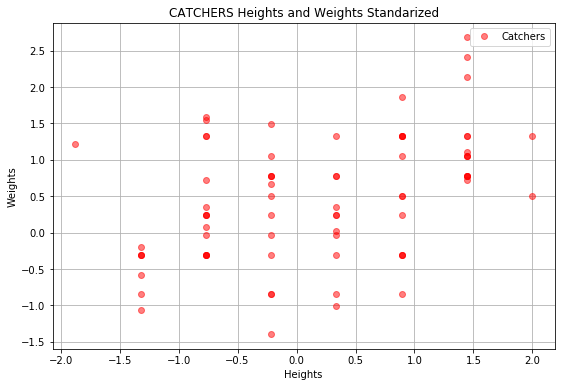

In [34]:
#test on one plot with x,y 
fig = plt.figure(figsize = (9,6))
#plt.plot(data_bball[y_bball== 1, 0], data_bball[y_bball== 1, 1], 'rv', alpha = 0.5, label = "Catchers")      #red diamonds 
plt.plot(data_bball[y_bball== 1, 0], data_bball[y_bball== 1, 1], 'ro', alpha = 0.5, label = "Catchers")      #red diamonds 
plt.xlabel("Heights")
plt.ylabel("Weights")
plt.title('CATCHERS Heights and Weights Standarized')
plt.legend()
plt.grid() #easier to see

In [38]:
#function name described by exercise 
def plot_data_boundary(data, y):

    fig = plt.figure(figsize = (9,6))
      
    plt.plot(data[y== 1, 0], data[y== 1, 1], 'rs', alpha = 0.5, label = "Catchers")      #red circles 
    plt.plot(data[y==-1, 0], data[y==-1, 1], 'ko', alpha = 0.5, label = "Shortstops")  #black squares 

    
    plt.xlabel("Height")
    plt.ylabel("Weight")
    plt.title('Catchers and Shortstops \nHeights and Weights Standarized')
    plt.legend()
    plt.grid() #easier to see 

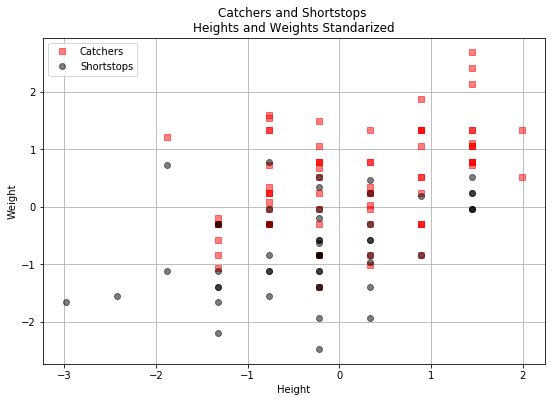

In [39]:
plot_data_boundary(data_bball,y_bball)

_Response._ 
There appears to be two groups, one clustered at the bottom left corner which is catchers and another at the top right that could be clustered by shortstops. It appears that they could be seperated by a negatively sloping line although a curved line or polygon would do a better job.

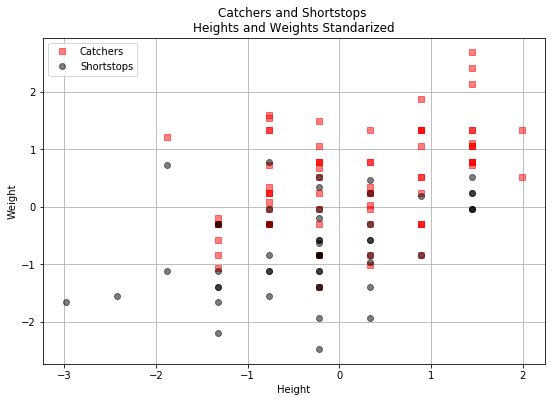

In [40]:
plot_data_boundary(data_bball, y_bball)

__A3.__ _(5 pts)_ The way we'll be drawing lines (hyperplanes) in this problem uses what's called the 'standard form'. Supposing we have vectors (rows) of features (columns) $x = [x_1, \cdots, x_m]$, a linear relationship is defined by a vector of weights $w = [w_1,\cdots,w_m]$ and an intercept $b$ in the form:
$$
w\cdot x + b = 0
$$
Since our data only has two columns, we can re-arrange into slope-intercept form:
$$
x_2 = -\frac{w_1}{w_2} x_1 - \frac{b}{w_2}
$$
to conveniently plot a line in standard form. 

So, modify your `plot_data_boundary()` function to accept a `w` (a vector) and `b` (a scalar) arguments and plot the corresponding line over the range of $x_1$ values using the slope-intercept form above. 

When complete, select you own $w$ and $b$ parameters and use your function to exhibit a corresponding line over the problem's data. Then, disucuss how well the line separates the two (catcher and shortstop) classes in the response box below.

In [44]:
#logic for the line 
w = np.array([0.25, 0.5])
b = 0 #intercept 
print("w0=",w[0])
print("w1=",w[1])
print("w0/w1=",-w[0]/w[1])  #not negative 0! 
print(-b/w[1])  #since b=0 this is always 0 
x = np.array([min(data_bball[:,0]),max(data_bball[:,0])])
print("x-values:",x)  #actually tuple x,y 
y = np.array(max(data_bball[:,0]))
print("y-values:", y)

if len(w):
    x = np.array([min(data_bball[:,0]),max(data_bball[:,0])])
    data_bball[:,0], (-w[0]/w[1])*data_bball[:,0] - b/w[1]  #b=0 so term goes away, but keep for other b values 
print("line:",x)


w0= 0.25
w1= 0.5
w0/w1= -0.5
0.0
x-values: [-2.98134744  1.99620654]
y-values: 1.996206543561634
line: [-2.98134744  1.99620654]


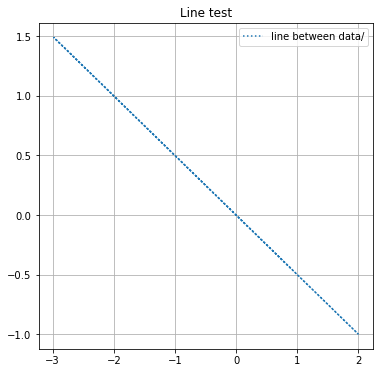

In [47]:
#test the line 
w = np.array([0.25, 0.5])
b = 0 
fig = plt.figure(figsize = (6,6))
if len(w):
    x = np.array([min(data_bball[:,0]),max(data_bball[:,0])])
    plt.plot(data_bball[:,0], (-w[0]/w[1])*data_bball[:,0] - b/w[1], ':', label = "line between data/") #could drop -b/w[1] 
plt.title("Line test")
plt.legend()  #add legend
plt.grid()

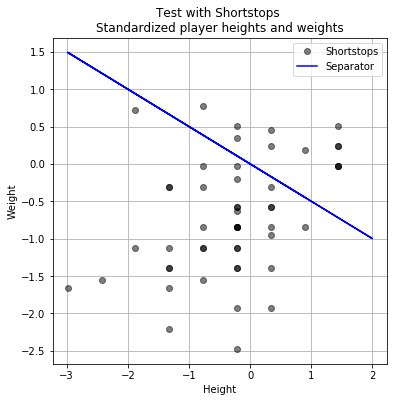

In [49]:
w = np.array([0.25, 0.5])
b = 0 
fig = plt.figure(figsize = (6,6))
plt.plot(data_bball[y_bball==-1, 0], data_bball[y_bball==-1, 1], 'ko', alpha = 0.5, label = "Shortstops")
 

plt.xlabel("Height")
plt.ylabel("Weight")
plt.title('Test with Shortstops \nStandardized player heights and weights')

if len(w):
    x = np.array([min(data_bball[:,0]),max(data_bball[:,0])])
    plt.plot(data_bball[:,0], (-w[0]/w[1])*data_bball[:,0] - b/w[1], 
             'b', label = "Separator")

plt.legend()

plt.grid()

In [50]:
def plot_data_boundary(data, y, w = np.array([]), b = 0):

    fig = plt.figure(figsize = (6,6))
    plt.plot(data[y==-1, 0], data[y==-1, 1], 'ko', alpha = 0.5, label = "Shortstops")
    plt.plot(data[y==1, 0], data[y==1, 1], 'rs', alpha = 0.5, label = "Catchers")
    
    plt.xlabel("Height")
    plt.ylabel("Weight")
    plt.title('Standardized player heights and weights')
    
    if len(w):
        x = np.array([min(data[:,0]),max(data[:,0])])
        plt.plot(data[:,0], (-w[0]/w[1])*data[:,0] - b/w[1], 
                 'b', label = "Separator")
        
    plt.legend()

    plt.grid()

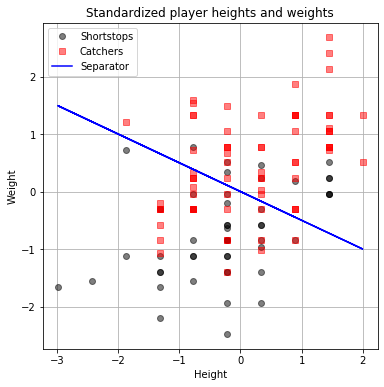

In [51]:
plot_data_boundary(data_bball, y_bball,[0.25,.5],0)

_Response._ 
See plot either above or below. The difference is just testing parameters and slow of line. From just looking at it the line (.25,.5) does a good job of splitting the data into 2 areas. With the top right as Catchers and bottom left as shortstops. If you do a count you can see that 7 shortstops are missclassified as catchers and it looks like 15 catchers are below the line and are missclassified as shortstops. So it does a better job predicting shortstops than catchers. 

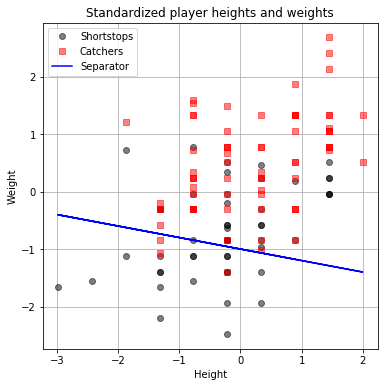

In [62]:
plot_data_boundary(data_bball, y_bball, w = np.array([0.1, 0.5]), b = 0.5)

__A4.__ _(3 pts)_ Now, for any point $x$ on the line defined by $w$ and $b$, the following relationship holds:
$$
w\cdot x + b = 0
$$

But our points probably don't lie exactly on a line. To tell which sides of the line they fall on, we can just look at the sign the left hand side of the equation above:

- $x$ is above the line:
    - $\hat{y} = w\cdot x_i + b > 0$ 
- $x$ is below the line:
    - $\hat{y} = w\cdot x_i + b < 0$

What we're hoping to do is have all $x$'s either have $y,\hat{y} < 0$ or $y,\hat{y} > 0$. One way to test if a point is 'correctly' separated is if $y\hat{y} > 0$, so use this test ($y\hat{y} > 0$ means 'separated') to write a function called 
- `separated(data, y, w, b)`

that outputs a boolean mask of $n$ values where `True` corresponds to a point falling on the correct side of the line ($y\hat{y} > 0$). When this is done, use your functon to calculate/report the percent of points your line correctly separated below.

In [63]:
#check x and y 
data_bball[:3]
y_bball[:3]

array([1, 1, 1], dtype=object)

In [64]:
def separated(data, y, w, b):
    return y*(data.dot(w) + b) > 0

In [65]:
is_sep = separated(data_bball, y_bball, np.array([0.25, 0.5]), 0)

In [66]:
is_sep[:5]

array([False,  True,  True,  True,  True])

In [67]:
sum(is_sep)

90

In [68]:
len(is_sep)

128

In [69]:
90/128

0.703125

In [70]:
print(100*sum(is_sep)/len(y_bball), "percent were separated correctly")

70.3125 percent were separated correctly


In [ ]:
# code here see above - actually better than I thought it would be !

__A5.__ _(3 pts)_ Now that we have our `separated()` function, use it to modify your `plot_data_boundary()` function into a new one called:
- plot_separated(data, y, w, b)

which plots the same points and line as before, but now color codes them for _correctness of separation_ as well label. In particular, organize your points as follows:
- indicate correctly separated negative points (shortstops) with black circles, 
- indicate incorrectly separated negative points (shortstops) with green triangles, 
- indicate correctly separated positive points (catchers) with red squares, and
- indicate incorrectly separated positive points (catchers) with yellow diamonds.

In [71]:
is_sep[:3]

array([False,  True,  True])

In [72]:
np.logical_not(is_sep)[:3]

array([ True, False, False])

In [73]:
not_sep  = np.logical_not(is_sep)

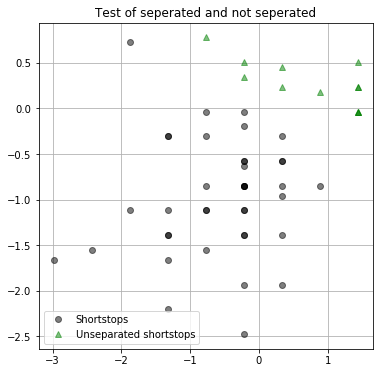

In [74]:
#get one graph working 
# x  is data_bball, y is y_bball
#separated and not seperated filters applied
#graph symbols from plt reference page 

fig = plt.figure(figsize = (6,6))
plt.title('Test of seperated and not seperated')

plt.plot(data_bball[is_sep,:][y_bball[is_sep]==-1, 0], data_bball[is_sep,:][y_bball[is_sep]==-1, 1],'ko', alpha = 0.5, label = "Shortstops")
#plot not_seperated 

plt.plot(data_bball[not_sep,:][y_bball[not_sep]==-1, 0], data_bball[not_sep,:][y_bball[not_sep]==-1, 1],'g^', alpha = 0.5, label = "Unseparated shortstops")

#     x = np.array([min(data[:,0]),max(data[:,0])])
#     plt.plot(data[:,0], (-w[0]/w[1])*data[:,0] - b/w[1], 
#              'b', label = "Separator")

plt.legend()

plt.grid()

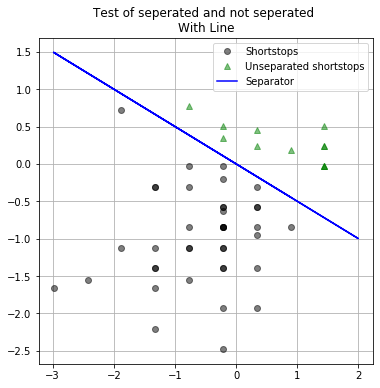

In [75]:
#get one graph working 
# x  is data_bball, y is y_bball
#separated and not seperated filters applied
#graph symbols from plt reference page 

fig = plt.figure(figsize = (6,6))
plt.title('Test of seperated and not seperated \nWith Line')
plt.plot(data_bball[is_sep,:][y_bball[is_sep]==-1, 0],
         data_bball[is_sep,:][y_bball[is_sep]==-1, 1], 
         'ko', alpha = 0.5, label = "Shortstops")
#plot not_seperated 

plt.plot(data_bball[not_sep,:][y_bball[not_sep]==-1, 0],
         data_bball[not_sep,:][y_bball[not_sep]==-1, 1], 
         'g^', alpha = 0.5, label = "Unseparated shortstops")

###############
# With line
##############

w = np.array([0.25, 0.5])
b = 0 


x = np.array([min(data_bball[:,0]),max(data_bball[:,0])])
plt.plot(data_bball[:,0], (-w[0]/w[1])*data_bball[:,0] - b/w[1], 
         'b', label = "Separator")

plt.legend()

plt.grid()

In [80]:
def plot_separated(data, y, w, b):
    
    is_sep = separated(data, y, w, b)
    not_sep = np.logical_not(is_sep)

    fig = plt.figure(figsize = (10,8))
    plt.plot(data[is_sep,:][y[is_sep]==-1, 0],
             data[is_sep,:][y[is_sep]==-1, 1],'ko', 
             alpha = 0.5, label = "Shortstops")
    plt.plot(data[is_sep,:][y[is_sep]==1, 0],
             data[is_sep,:][y[is_sep]==1, 1],'rs',
             alpha = 0.5, label = "Catchers")
    
    plt.xlabel("Height")
    plt.ylabel("Weight")
    plt.title('Standardized player heights and weights')

    plt.plot(data[not_sep,:][y[not_sep]==-1, 0],
             data[not_sep,:][y[not_sep]==-1, 1],'g^', 
             alpha = 0.5, label = "Unseparated shortstops")
    plt.plot(data[not_sep,:][y[not_sep]==1, 0],
             data[not_sep,:][y[not_sep]==1, 1],'yd',
             alpha = 0.5, label= "Unseparated catchers")

    x = np.array([min(data[:,0]),max(data[:,0])])
    plt.plot(data[:,0], (-w[0]/w[1])*data[:,0] - b/w[1],'b', label = "Separator")
        
    plt.legend()

    plt.grid()


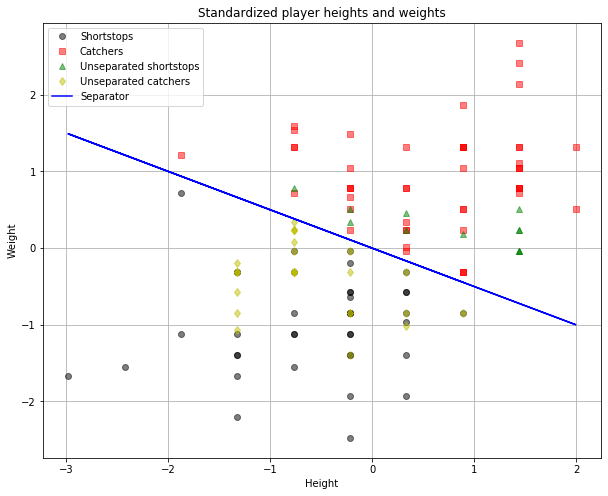

In [81]:
plot_separated(data_bball, y_bball, w = np.array([0.25, 0.5]), b = 0)

In [82]:
# code here see above 

__A6.__ _(5 pts)_ Now, most of all we'll want to reduce the number of points $x$ for which our prediction $\hat{y}$ has a different sign from the true label $y$. In these (bad) cases, one will have $y\hat{y} < 0$.

However, 'edge cases' are bad, too, and since we've provided our points with unit ($y = \pm 1$) labels it's also important to pay attention to points whose prediction have correct sign ($y\hat{y} > 0$), but are close to the boundary (here, within one unit):

$$
y(w\cdot x + b) = y\hat{y} < 1
$$

Thus, our objective function will seek to _maximize_ the distance between our $(w,b)$ separating line (plane) and 'bad' points holding the relationship $y(w\cdot x + b) = y\hat{y} < 1$. So, for a given plane $(w,b)$ and $n$ `data` points $x_i: i=1,\cdots n$, we'll be working with a subset of $k$ 'bad' points: $x_{i_\ell}:\ell=1,\cdots k$. To identify these, write a function:

- `bad_points(data, y, w, b)`

that takes `data` of $n$ rows and $m$ columns/features, line-defining parameters $w$ (a vector of $m$) and $b$ (a scalar), and outputs a boolean mask positively identifying the 'bad points' using a boolean mask, i.e., those for which:

$$
y(w\cdot x + b) = y\hat{y} < 1
$$

Note: this function is very similar to the requested `separated()` in __A4__.

When this is complete, exhibit this function's output using the line you selected in __A3__.

In [79]:
def bad_points(data, y, w, b):
    return y*(data.dot(w) + b) < 1
    
bad_points(data_bball, y_bball, w = np.array([0.25, 0.5]), b = 0)

array([ True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False]

In [ ]:
# code here

__A6.__ _(4 pts)_ "How bad" a point is, is defined by distance&mdash;between our line (hyperplane) and the point. For a given point $x$ and line defined by $w$ and $b$, the distance is:
$$
d(x;w, b) = \frac{|w\cdot x + b|}{\|w\|}
$$
But since being on the wrong side (having the wrong sign) is extra bad, it's actually the signed distances we care about:
$$
d(x;w, b)_\text{sgn} =\frac{y(w\cdot x + b)}{\|w\|}
$$
This makes the sum of signed distances for the 'bad points' we've found into our objective function, which we'll aim to maximize:
$$
\begin{align*}
   D (X; w, b) 
   = &\sum_{\ell=1}^k d_\text{sgn}(x_{i_\ell};w, b) \\
   = &\sum_{\ell=1}^k \frac{y_{i_\ell}(w\cdot x_{i_\ell}+ b)}{\|w\|}
\end{align*}
$$

Since this is our objective function, express it's gradient components with respect to the parameters $b$ and $w_j$ (for any $j$ of the $m$ features) in the response box below.

_Response_.
$$
\nabla_b(D) = ?
$$
$$
\nabla_{w_j}(D) = ?
$$

#http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Typesetting%20Equations.html 

#https://en.wikibooks.org/wiki/LaTeX/Mathematics




_Response_.
Learned a lot of LaTex doing this! 
$$
\nabla_b(D) = \frac{1}{\|w\|}\sum_{\ell=1}^k y_{i_\ell}
$$
$$
\nabla_{w_j}(D) = \frac{1}{\|w\|}\sum_{\ell=1}^k y_{i_\ell}x_{{i_\ell},j}
$$

In [116]:
#normalize 
np.sqrt(w.dot(w))
wnormalized = np.sqrt(w.dot(w))

In [117]:
#create filter for bad points 
not_seperated = bad_points(data_bball, y_bball,w,b)
not_sep[:10]

array([ True, False, False, False, False, False, False,  True, False,
        True])

In [121]:
#test gradient using test vars above  
g_w = sum((data_bball*y_bball[:,None])[not_sep])/wnormalized
g_b = sum(y_bball[:,None][not_sep])/wnormalized
print('g_w',g_w)
print('g_b',g_b)

g_w [-44.984352443404646 -24.257834985222086]
g_b [25.043961347997644]


In [123]:
#code 
def gradient(data, y, w , b):
    wnorm = np.sqrt(w.dot(w))
    
    nonsep = bad_points(data, y, w, b) #from above 
    
    g_w = sum((data*y[:,None])[nonsep])/wnorm
    g_b = sum(y[:,None][nonsep])/wnorm
    #test/debug
    print('g_w',g_w)
    print('g_b',g_b)
    
    return(g_w, g_b)



In [124]:
gradient(data_bball, y_bball, np.array([0.25, 0.5]), 0)

g_w [8.749533842943988 77.43059665753808]
g_b [46.51021393199562]


(array([8.749533842943988, 77.43059665753808], dtype=object),
 array([46.51021393199562], dtype=object))

__A8.__ _(10 pts)_ Finally, it's time to pull things together into a gradient descent application. Specifically, create a function called 
- `GD(data, y, w, b, eta=0.001, iter_num=1000, threshold=0.001)`
that accepts the following arguments:

- `data`: a matrix of $n$ row/data points by $m$ feature/columns
- `y`:  an array of $n$ $\pm 1$ valued 'labels'
- `w`, `b`: an array of initial weights and an intercept (initial parameters) 
- `eta=0.001`: the 'learning rate' i.e., 'sensitivity' knob
- `iter_num=1000`: the max number of gradient steps to take before termnating
- `threshold=0.001`: a fixed, minimum distance that when steps fall below terminates the algorithm

To correctly implement, your code must do the following:
1. loop over `iter_num` steps
2. compute $w$ and $b$ gradient components
3. determinie $w$ and $b$ steps sizes
4. update $w$ and $b$ by _adding_ gradient components (this is technically ascent)
5. terminate if `iter_num` steps are complete or if the most recent step is smaller than `threshold`
6. `return` a list of the history of $w$ and $b$ values

When this is complete, apply your code to the standardized `bball` data and labels starting with your selected line from __A3__, and print the final parameters and whether or not your code converged, i.e., the threshold was met.

In [125]:
#make sure we have all the parameters and right dfs 
data_bball[:3]

array([[ 0.89008344, -0.84843489],
       [ 0.89008344,  1.05110949],
       [-0.21603967,  0.77974601]])

In [126]:
y_bball[:3]

array([1, 1, 1], dtype=object)

In [127]:
print('b=',b)
print('range=',w)

b= 0
range= [0.25 0.5 ]


In [128]:
#gradient(data_bball, y_bball, w, b)

In [129]:
eta=.001
iter_num = 1000 
threshold=.001

In [130]:
####################################################
# test the values for the first point
####################################################
wdelta = w
bdelta = b 
#get the gradients
g_w, g_b = gradient(data_bball, y_bball, w, b)
print('grad_w',g_w,'grad_B',g_b)
#get the delta 
wdelta = eta*g_w
bdelta = float(eta*g_b)  #error type float which has no callable sqrt method ....declare float
print('wdelta',w,'bdelta',b)
print('test',np.sqrt(wdelta.dot(wdelta) + bdelta**2))

print('test against threshold',np.sqrt(wdelta.dot(wdelta) + bdelta**2) < threshold)

g_w [8.749533842943988 77.43059665753808]
g_b [46.51021393199562]
grad_w [8.749533842943988 77.43059665753808] grad_B [46.51021393199562]
wdelta [0.25 0.5 ] bdelta 0
test 0.09074828726323801
test against threshold False


In [131]:
def GD(data, y, w, b, eta=0.001, iter_num=1000, threshold=0.001):  #eta is error 
    ws, bs = [], []

    for i in range(iter_num):
        g_w, g_b = gradient(data, y, w, b)
        print('iter:',i,'grad_w',g_w,'grad_B',g_b)

        wdelta = eta*g_w
        bdelta = float(eta*g_b)
        print('wdelta',w,'bdelta',b)
        

        w = w + wdelta; ws.append(w)
        b = b + bdelta; bs.append(b)
        print('w',w,'b',b)
        
        if np.sqrt(wdelta.dot(wdelta) + bdelta**2) < threshold:
            print(i)
            break
        
    return ws, bs

In [132]:
np.random.seed(0)  #so same results 
ws, bs = GD(data_bball, y_bball, w = np.array([0.25, 0.5]), b = 0)
#print(ws[-1], bs[-1])

g_w [8.749533842943988 77.43059665753808]
g_b [46.51021393199562]
iter: 0 grad_w [8.749533842943988 77.43059665753808] grad_B [46.51021393199562]
wdelta [0.25 0.5 ] bdelta 0
w [0.25874953384294397 0.577430596657538] b 0.04651021393199562
g_w [-8.23523546826719 50.86091176642945]
g_b [30.027475078922308]
iter: 1 grad_w [-8.23523546826719 50.86091176642945] grad_B [30.027475078922308]
wdelta [0.25874953384294397 0.577430596657538] bdelta 0.04651021393199562
w [0.25051429837467676 0.6282915084239675] b 0.07653768901091793
g_w [-7.2056543709131375 44.7203673259495]
g_b [29.56860416764533]
iter: 2 grad_w [-7.2056543709131375 44.7203673259495] grad_B [29.56860416764533]
wdelta [0.25051429837467676 0.6282915084239675] bdelta 0.07653768901091793
w [0.24330864400376362 0.673011875749917] b 0.10610629317856325
g_w [-8.223269582586619 36.875503299147994]
g_b [23.75488008356936]
iter: 3 grad_w [-8.223269582586619 36.875503299147994] grad_B [23.75488008356936]
wdelta [0.24330864400376362 0.67301187

wdelta [-0.23390573845661147 1.3046258750600415] bdelta 0.39006890864452637
w [-0.23631808075349112 1.307481308389331] b 0.39157785467959066
g_w [-2.4064639737445823 2.8484752952568604]
g_b [1.5052690807618605]
iter: 92 grad_w [-2.4064639737445823 2.8484752952568604] grad_B [1.5052690807618605]
wdelta [-0.23631808075349112 1.307481308389331] bdelta 0.39157785467959066
w [-0.2387245447272357 1.310329783684588] b 0.39308312376035254
g_w [-2.400623742811988 2.8415623500760505]
g_b [1.5016159535414833]
iter: 93 grad_w [-2.400623742811988 2.8415623500760505] grad_B [1.5016159535414833]
wdelta [-0.2387245447272357 1.310329783684588] bdelta 0.39308312376035254
w [-0.2411251684700477 1.3131713460346641] b 0.394584739713894
g_w [-2.394821234394206 2.8346940561564646]
g_b [1.497986422159571]
iter: 94 grad_w [-2.394821234394206 2.8346940561564646] grad_B [1.497986422159571]
wdelta [-0.2411251684700477 1.3131713460346641] bdelta 0.394584739713894
w [-0.2435199897044419 1.3160060400908207] b 0.3960

In [140]:
# code above

__A9.__ _(3 pts)_ Now, exhibit the final (best line) from your application in __A7__ using your `plot_separated()` function, report it's percent separated, and discuss if you think the line forms a better separation than the original line in the comment box below.

_Response._ 
Yes this is about 8% better so gradient descent increased accuracy 

78.125 percent separated


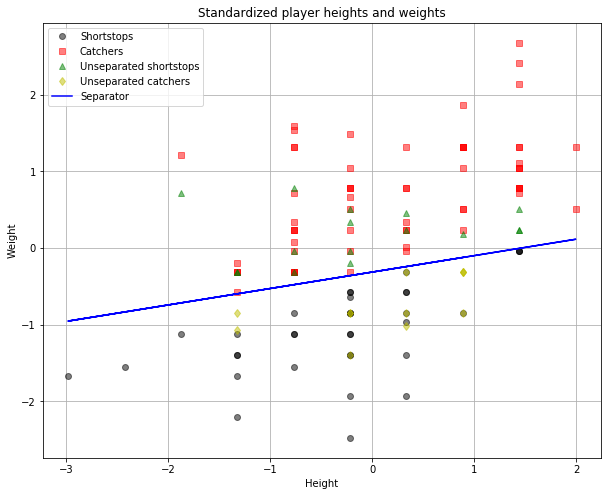

In [141]:
is_sep = separated(data_bball, y_bball, ws[-1], bs[-1])

print(100*sum(is_sep)/len(y_bball), "percent separated")

plot_separated(data_bball, y_bball, ws[-1], bs[-1])

In [142]:
# code here see above 

__A10.__ (5 pts) As a last step, modify `plot_data_boundary()` again, but now into a new function called `plot_convergence()` that accepts the full history of `ws` and `bs` that were output by you `GD` function in __A7.__ and exhibits all lines corresponding to the steps along the way to convergence. Use the output of this code to discuss in the comment box below if you believe your code is converging towards a good-separating solution.

\[Hint. Use changing alpha or a colormap to help illustrate thr transition between values of $w$ and $b$\].

_Response._ 
Yes even without an alpha function to show the convergence it appears that this approaching a a good-seperating solution with +75% accuracy which is already fairly accurate. The next question is whether this is overfitted to the data, ie this prediction would only work for this data set. 

In [172]:
#vars for alpha need a constant increase for alpha but below 1 
print('ws=',ws[:3])
len(ws) #length of count for alpha 

ws= [array([0.25874953384294397, 0.577430596657538], dtype=object), array([0.25051429837467676, 0.6282915084239675], dtype=object), array([0.24330864400376362, 0.673011875749917], dtype=object)]


132

In [168]:
#using changing alpha 
for i in range(len(ws)):
    alpha = (0.3*i)/len(ws)
    print(alpha)

0.0
0.0022727272727272726
0.004545454545454545
0.006818181818181818
0.00909090909090909
0.011363636363636364
0.013636363636363636
0.01590909090909091
0.01818181818181818
0.02045454545454545
0.022727272727272728
0.024999999999999998
0.02727272727272727
0.029545454545454545
0.03181818181818182
0.03409090909090909
0.03636363636363636
0.038636363636363635
0.0409090909090909
0.04318181818181818
0.045454545454545456
0.04772727272727273
0.049999999999999996
0.05227272727272727
0.05454545454545454
0.056818181818181816
0.05909090909090909
0.06136363636363636
0.06363636363636364
0.0659090909090909
0.06818181818181818
0.07045454545454545
0.07272727272727272
0.075
0.07727272727272727
0.07954545454545454
0.0818181818181818
0.08409090909090909
0.08636363636363636
0.08863636363636362
0.09090909090909091
0.09318181818181817
0.09545454545454546
0.09772727272727273
0.09999999999999999
0.10227272727272728
0.10454545454545454
0.10681818181818181
0.10909090909090909
0.11136363636363636
0.11363636363636363


In [169]:
#without alpha as a function!
def plot_convergence1(data, y, ws, bs):

    fig = plt.figure(figsize = (10,8))

    for i in range(len(ws)):
        x = np.array([min(data[:,0]),max(data[:,0])])
        plt.plot(data[:,0], (-ws[i][0]/ws[i][1])*data[:,0] - bs[i]/ws[i][1],
                 'b', alpha =.3)  #make alpha a function?
    
    #from above 
    plt.plot(data[y==-1, 0], data[y==-1, 1], 'ko', alpha = 0.5, label = "Shortstops")
    plt.plot(data[y==1, 0], data[y==1, 1], 'rs', alpha = 0.5, label = "Catchers")
    
    plt.xlabel("Height")
    plt.ylabel("Weight")
    plt.title('Standardized player heights and weights \n With transition w and b')
    plt.legend()
    plt.grid()
 
 

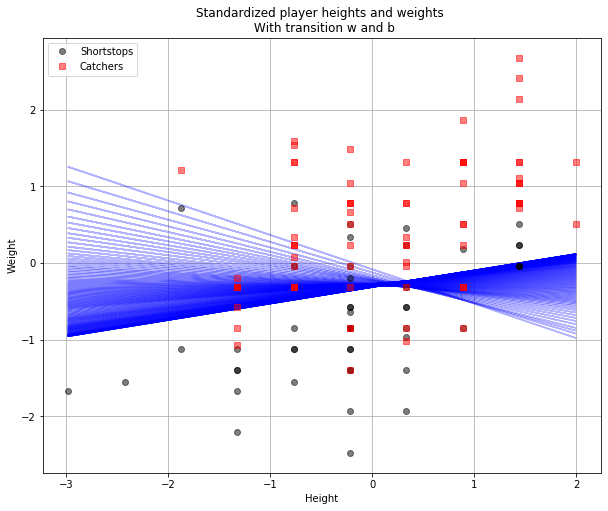

In [170]:
plot_convergence1(data_bball, y_bball, ws, bs) #no alpha function

In [162]:
#with alpha function 
def plot_convergence1(data, y, ws, bs):

    fig = plt.figure(figsize = (10,8))

    for i in range(len(ws)):
        x = np.array([min(data[:,0]),max(data[:,0])])
        plt.plot(data[:,0], (-ws[i][0]/ws[i][1])*data[:,0] - bs[i]/ws[i][1],
                 'b', alpha = (0.3*i)/len(ws))  # with alpha function... 
    
    #from above 
    plt.plot(data[y==-1, 0], data[y==-1, 1], 'ko', alpha = 0.5, label = "Shortstops")
    plt.plot(data[y==1, 0], data[y==1, 1], 'rs', alpha = 0.5, label = "Catchers")
    plt.grid()
    plt.xlabel("Height")
    plt.ylabel("Weight")
    plt.title('Standardized player heights and weights \n With transition w and b')
    plt.legend()


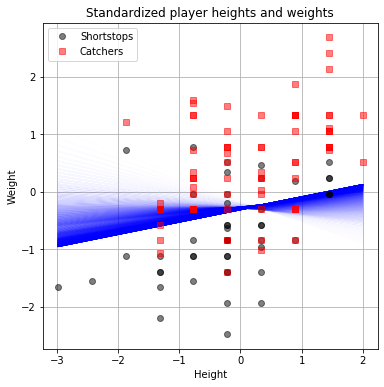

In [163]:
#code here 
plot_convergence(data_bball, y_bball, ws, bs) #with alpha function... ok it's cooler.